In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("4_허건호03.csv",encoding='UTF8')
df

,한달내의 시기,계절,주말여부,화재발생시간대,시군구명,발화지점,날씨,온도,습도,시간단위풍속,특보내용,발화원인종합,출동소요시간,현장소방서거리,현장안전센터거리,전체인력수합계,화재진압시간,동원장비수,피해면적
0,월말,겨울,1,21~24,강릉시,산정상,맑음,-1,30,45,NaN,방화 및 방화의심,1700,9,9,37,1800,8,0.30
1,월말,겨울,0,18~21,양양군,산아래,맑음,1,10,225,특보_건조,인간의 부주의,1615,43,13,1872,155952,71,30.00
2,월중순,겨울,0,15~18,홍천군,산중턱,구름많음,-2,29,225,NaN,인간의 부주의,2240,37,37,171,20500,9,0.30
3,월중순,겨울,1,3~6,원주시,산중턱,구름많음,-6,44,225,NaN,인간의 부주의,2019,20,20,94,35009,9,0.30
4,월말,겨울,1,15~18,원주시,산정상,맑음,14,23,180,NaN,인간의 부주의,508,8,2,46,3825,8,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,월초,봄,1,12~15,철원군,산중턱,맑음,19,26,315,NaN,인간의 부주의,801,16,7,60,2915,12,0.03
535,월초,봄,1,15~18,철원군,산정상,맑음,18,22,270,NaN,인간의 부주의,347,12,1,67,4529,13,0.01
536,월중순,봄,0,15~18,태백시,산중턱,맑음,23,43,45,NaN,기계/전기/화학 요인,2121,20,17,144,43459,18,1.20
537,월초,여름,0,15~18,강릉시,산중턱,맑음,25,62,225,NaN,인간의 부주의,1344,21,6,50,12539,11,0.01


In [3]:
df.shape

(539, 19)

In [4]:
data = df

In [5]:
#Feature 와 target 나누기
features = data[data.columns[:-1]]
target = data[data.columns[-1]]

In [6]:
features = pd.get_dummies(data = features, columns = ['한달내의 시기'], prefix = '한달내의 시기')
features = pd.get_dummies(data = features, columns = ['계절'], prefix = '계절')
features = pd.get_dummies(data = features, columns = ['화재발생시간대'], prefix = '화재발생시간대')
features = pd.get_dummies(data = features, columns = ['시군구명'], prefix = '시군구명')
features = pd.get_dummies(data = features, columns = ['발화지점'], prefix = '발화지점')
features = pd.get_dummies(data = features, columns = ['날씨'], prefix = '날씨')
features = pd.get_dummies(data = features, columns = ['발화원인종합'], prefix = '발화원인종합')
features = pd.get_dummies(data = features, columns = ['특보내용'], prefix = '특보내용')

In [7]:
print("컬럼 목록:", data.columns)

컬럼 목록: Index(['한달내의 시기', '계절', '주말여부', '화재발생시간대', '시군구명', '발화지점', '날씨', '온도', '습도',
       '시간단위풍속', '특보내용', '발화원인종합', '출동소요시간', '현장소방서거리', '현장안전센터거리', '전체인력수합계',
       '화재진압시간', '동원장비수', '피해면적'],
      dtype='object')


In [8]:
features

,주말여부,온도,습도,시간단위풍속,출동소요시간,현장소방서거리,현장안전센터거리,전체인력수합계,화재진압시간,동원장비수,한달내의 시기_월말,한달내의 시기_월중순,한달내의 시기_월초,계절_가을,계절_겨울,계절_봄,계절_여름,화재발생시간대_0~3,화재발생시간대_12~15,화재발생시간대_15~18,화재발생시간대_18~21,화재발생시간대_21~24,화재발생시간대_3~6,화재발생시간대_6~9,화재발생시간대_9~12,시군구명_강릉시,시군구명_고성군,시군구명_동해시,시군구명_삼척시,시군구명_속초시,시군구명_양구군,시군구명_양양군,시군구명_영월군,시군구명_원주시,시군구명_인제군,시군구명_정선군,시군구명_철원군,시군구명_춘천시,시군구명_태백시,시군구명_평창군,시군구명_홍천군,시군구명_화천군,시군구명_횡성군,발화지점_미상,발화지점_산아래,발화지점_산정상,발화지점_산중턱,발화지점_평지,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_비,날씨_소나기,날씨_흐림,발화원인종합_기계/전기/화학 요인,발화원인종합_미상,발화원인종합_방화 및 방화의심,발화원인종합_인간의 부주의,발화원인종합_자연적 요인,특보내용_특보_강풍,특보내용_특보_건조,특보내용_특보_대설,특보내용_특보_풍랑,특보내용_특보_한파
0,1,-1,30,45,1700,9,9,37,1800,8,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0,1,10,225,1615,43,13,1872,155952,71,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False
2,0,-2,29,225,2240,37,37,171,20500,9,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,1,-6,44,225,2019,20,20,94,35009,9,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,14,23,180,508,8,2,46,3825,8,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1,19,26,315,801,16,7,60,2915,12,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
535,1,18,22,270,347,12,1,67,4529,13,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
536,0,23,43,45,2121,20,17,144,43459,18,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
537,0,25,62,225,1344,21,6,50,12539,11,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,Tru

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3,random_state = 22
)

In [10]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (377, 64)
y_train shape: (377,)


In [11]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (162, 64)
y_test shape: (162,)


1차 분석

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

model = DecisionTreeRegressor(random_state=22)

model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=22)

In [13]:
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_hat))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_hat))

In [15]:
# R² 점수 계산
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_hat)
print("R² Score:", r2)

R² Score: -21.404874523513673


In [16]:
print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)

RMSE on training set: 4.429457305695217e-18
RMSE on test set: 101.62059362533478


In [17]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor(random_state=22)

param_grid = {
    'max_depth': [2, 3, 4, 5, 7, 10, 20],
    'min_samples_split': [2, 3, 4, 5, 7, 12, 14, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}

# GridSearchCV 수행
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 점수 출력
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)


Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score:  3956.861635877678


In [18]:
model = DecisionTreeRegressor(max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=22)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=22)

In [19]:
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

In [20]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_hat))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_hat))

print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)

RMSE on training set: 3.145731055703614
RMSE on test set: 101.49793354508876


In [21]:
# R² 점수 계산
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_hat)
print("R² Score:", r2)

R² Score: -21.350820024800406


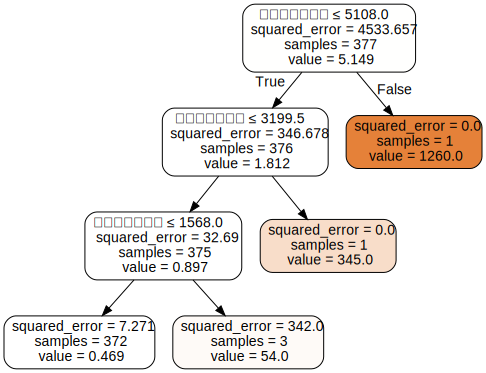

In [22]:
#tree 시각화
import graphviz 
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model, out_file=None, 
                           feature_names=X_train.columns,  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("tree", format='png')  
graph 


2차 분석

In [23]:
features = features.drop(['전체인력수합계','동원장비수'],axis=1)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3,random_state = 22
)

In [25]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (377, 62)
y_train shape: (377,)


In [26]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (162, 62)
y_test shape: (162,)


In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

model = DecisionTreeRegressor(random_state=22)

model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=22)

In [28]:
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_hat))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_hat))

In [30]:
# R² 점수 계산
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_hat)
print("R² Score:", r2)

R² Score: 0.1477133021850603


In [31]:
print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)

RMSE on training set: 4.506279594042046e-18
RMSE on test set: 19.81998514406888


In [32]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor(random_state=22)

param_grid = {
    'max_depth': [2, 3, 4, 5, 7, 10, 20],
    'min_samples_split': [2, 3, 4, 5, 7, 12, 14, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}

# GridSearchCV 수행
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 점수 출력
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)


Best hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best score:  5110.860221205728


In [33]:
model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5, random_state=22)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                      random_state=22)

In [34]:
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

In [35]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_hat))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_hat))

print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)

RMSE on training set: 33.48306418333812
RMSE on test set: 18.846588780068767


In [36]:
# R² 점수 계산
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_hat)
print("R² Score:", r2)

R² Score: 0.2293723804424408


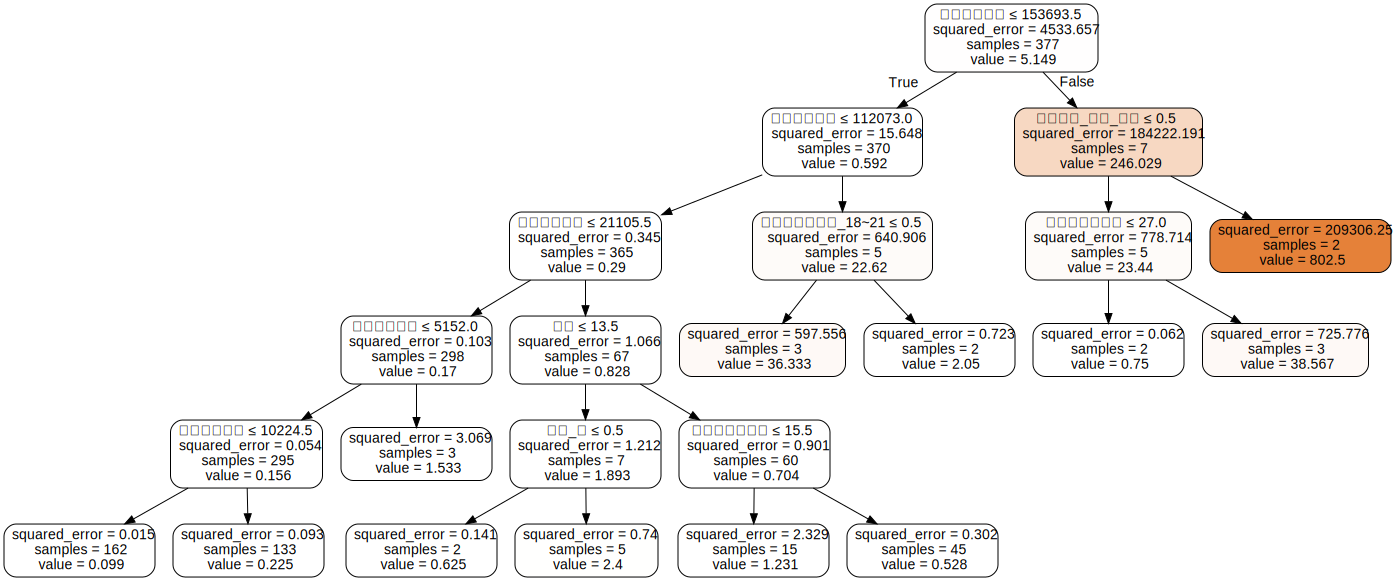

In [37]:
#tree 시각화
import graphviz 
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model, out_file=None, 
                           feature_names=X_train.columns,  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("tree", format='png')  
graph 


In [38]:
plt.savefig('savefig_default.png')

<Figure size 640x480 with 0 Axes>

3차 분석

In [39]:
features = features.drop(['화재진압시간'],axis=1)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3,random_state = 22
)

In [41]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (377, 61)
y_train shape: (377,)


In [42]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (162, 61)
y_test shape: (162,)


In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

model = DecisionTreeRegressor(random_state=22)

model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=22)

In [44]:
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

In [45]:
from sklearn.metrics import mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_hat))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_hat))

In [46]:
# R² 점수 계산
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_hat)
print("R² Score:", r2)

R² Score: -0.1322603496377046


In [47]:
print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)

RMSE on training set: 2.9032974979110384e-18
RMSE on test set: 22.84460320686294


In [48]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor(random_state=22)

param_grid = {
    'max_depth': [2, 3, 4, 5, 7, 10, 20],
    'min_samples_split': [2, 3, 4, 5, 7, 12, 14, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}

# GridSearchCV 수행
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 점수 출력
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)


Best hyperparameters:  {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score:  4549.478826288098


In [49]:
model = DecisionTreeRegressor(max_depth=2, min_samples_leaf=2, min_samples_split=2, random_state=22)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=2, random_state=22)

In [50]:
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

In [51]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_hat))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_hat))

print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)

RMSE on training set: 33.7606668888528
RMSE on test set: 21.5513569048797


In [52]:
# R² 점수 계산
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_hat)
print("R² Score:", r2)

R² Score: -0.007693133541981201


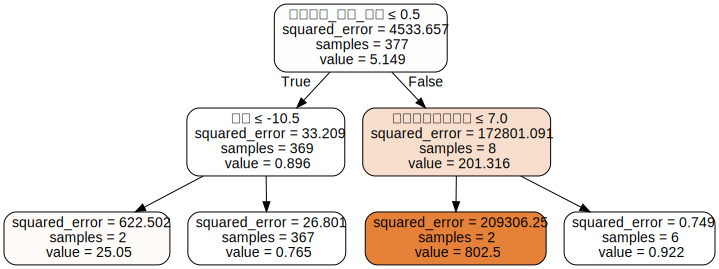

In [53]:
#tree 시각화
import graphviz 
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model, out_file=None, 
                           feature_names=X_train.columns,  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 
